In [1]:
!pip install diffusers==0.11.1
!pip install transformers scipy ftfy accelerate

#no idea why it needs jax but fine
!pip install "jax==0.4.23"

import torch
from diffusers import StableDiffusionPipeline

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 354.4 kB/s eta 0:00:00 kB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.0 MB/s eta 0:00:0031m375.9 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.1 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 1.4 MB/s eta 0:00:00 MB/s eta 0:00:01:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 4.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 790.9/790.9 kB 5.0 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 5.8 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 6.5 MB/s eta 0:00:006.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 4.3 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

There was a problem when trying to write in your cache folder (/home/user/.cache/huggingface/hub). You should set the environment variable TRANSFORMERS_CACHE to a writable directory.


In [2]:
import torch
from diffusers import StableDiffusionPipeline

In [3]:
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

/home/user/anaconda3/envs/diffuse/lib/python3.12/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
safety_checker/pytorch_model.fp16.safetensors not found


Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


In [5]:
pipe.text_encoder

CLIPTextModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 768)
      (position_embedding): Embedding(77, 768)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPSdpaAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), ep

In [6]:
out=pipe.tokenizer('cat sitting on a chair')
out

{'input_ids': [49406, 2368, 4919, 525, 320, 4269, 49407], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}

In [7]:
input_ids=torch.IntTensor([out['input_ids']]).to('cuda')
input_ids

tensor([[49406,  2368,  4919,   525,   320,  4269, 49407]], device='cuda:0',
       dtype=torch.int32)

In [8]:
embedings=pipe.text_encoder(input_ids)
{k:v.shape for k,v in embedings.items()}

{'last_hidden_state': torch.Size([1, 7, 768]),
 'pooler_output': torch.Size([1, 768])}

In [9]:
import matplotlib.pyplot as plt

img=embedings.pooler_output[0].cpu().detach()#.numpy()
img=torch.stack([img for _ in range(100)]).numpy()
plt.imshow(img)


ModuleNotFoundError: No module named 'matplotlib'

In [10]:

history=[]
def save_ims(step: int, timestep: int, latents: torch.FloatTensor):
  history.append(pipe.decode_latents(latents.clone()))
prompt = "portrait photo of a asia old warrior chief, tribal panther make up, blue on red, side profile, looking away, serious eyes, 50mm portrait photography, hard rim lighting photography–beta –ar 2:3 –beta –upbeta –upbeta"
output = pipe(prompt,callback=save_ims,num_inference_steps=100,guidance_scale=7.)
output

  0%|          | 0/100 [00:00<?, ?it/s]

StableDiffusionPipelineOutput(images=[<PIL.Image.Image image mode=RGB size=512x512 at 0x73CCC061A300>], nsfw_content_detected=[False])

In [11]:
output.images[0]

In [12]:
from PIL import Image
import numpy as np

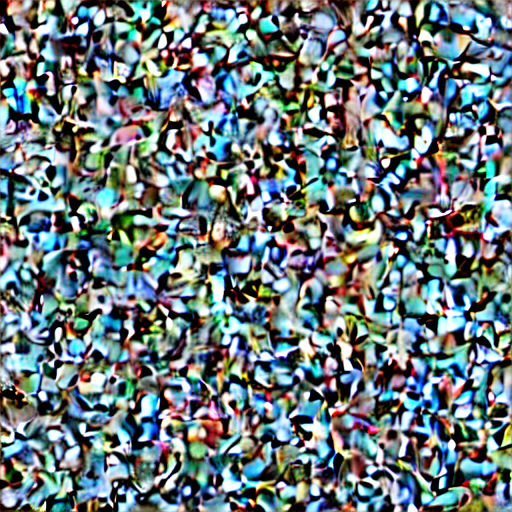

In [13]:
images=[pipe.numpy_to_pil(x)[0] for x in history]
images[0]

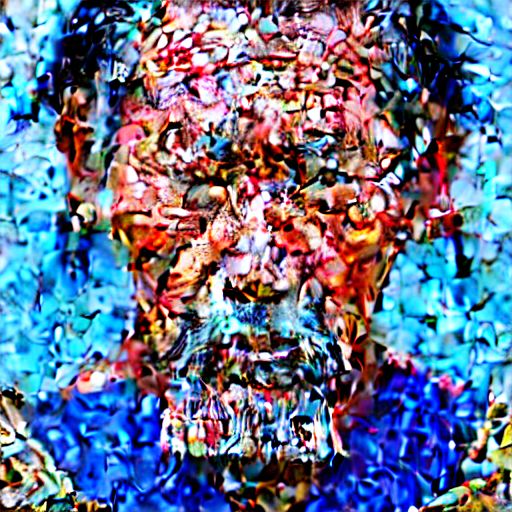

In [14]:
images[61]

In [16]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 432.6 kB/s eta 0:00:001m362.1 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 5.8 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.2/309.2 kB 3.0 MB/s eta 0:00:00 MB/s eta 0:00:0101
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 5.7 MB/s eta 0:00:000:00:010:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.9 MB/s eta 0:00:002.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 2.0 MB/s eta 0:00:0031m4.3 MB/s eta 0:00:01


In [23]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

# Assume images is an array of images.
def make_animation(images):
    fig, ax = plt.subplots()  # Create a figure and a set of subplots
    frames = []  # for storing the generated images

    for img in images:
        frame = [plt.imshow(img, animated=True)]
        frames.append(frame)

    ani = animation.ArtistAnimation(fig, frames, interval=150, blit=True, repeat_delay=1000)
    ani.save("dif_anim.mp4")
    plt.show()

# Example usage:
make_animation(images)


<IPython.core.display.Javascript object>

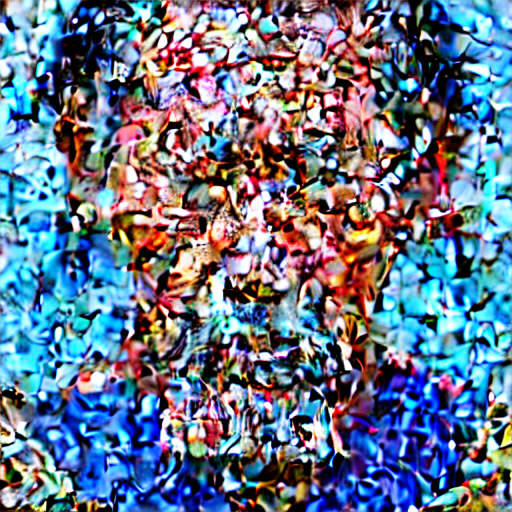

In [18]:
images[-50]

In [19]:
mem=history
history=[]

In [20]:
from diffusers import StableDiffusionImg2ImgPipeline

In [21]:
pipe2=StableDiffusionImg2ImgPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
pipe2 = pipe2.to("cuda")
#pipe2

/home/user/anaconda3/envs/diffuse/lib/python3.12/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
safety_checker/pytorch_model.fp16.safetensors not found


Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


In [22]:
history=[]
prompt = "portrait photo of a asia old warrior chief, tribal panther make up, blue on red, side profile, looking away, serious eyes, 50mm portrait photography, hard rim lighting photography–beta –ar 2:3 –beta –upbeta –upbeta "
output = pipe2(prompt,images[-35],callback=save_ims,num_inference_steps=100,guidance_scale=10.,strength=0.3)
output.images[0]
prompt

  0%|          | 0/30 [00:00<?, ?it/s]

'portrait photo of a asia old warrior chief, tribal panther make up, blue on red, side profile, looking away, serious eyes, 50mm portrait photography, hard rim lighting photography–beta –ar 2:3 –beta –upbeta –upbeta '

In [ ]:
text

In [ ]:
output.images[0].save('dragon.jpg')

  0%|          | 0/90 [00:00<?, ?it/s]

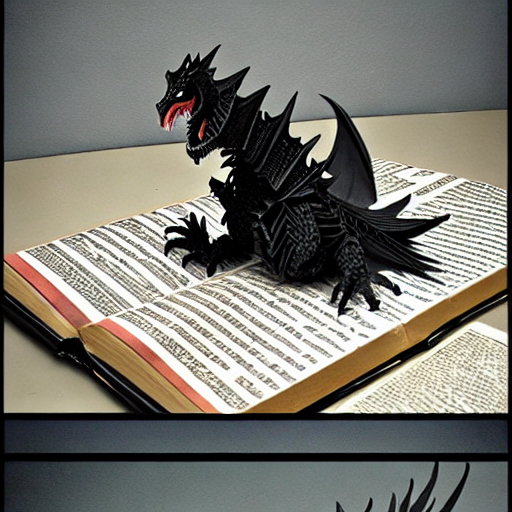

In [ ]:
history=[]
prompt = "black dragon made of books and paper detailed fantasy"
output = pipe2(prompt,images[-50],callback=save_ims,num_inference_steps=100,guidance_scale=10.,strength=0.9)
output.images[0]

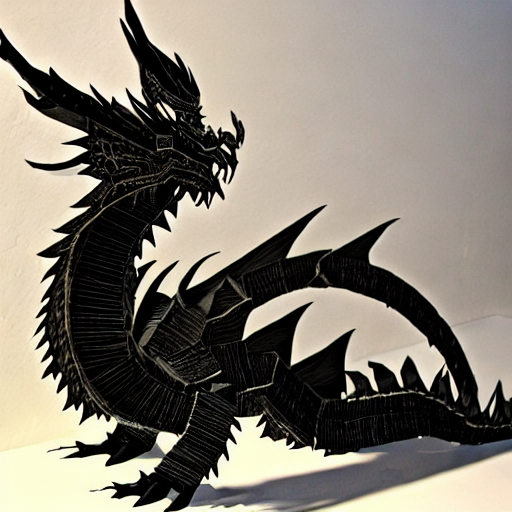

In [ ]:
images2=[pipe.numpy_to_pil(x)[0] for x in history]
images2[-1]

In [ ]:
make_animation(images2)

<IPython.core.display.Javascript object>